In [7]:
#####################################
yaml_dir = '../../examples/user/output/test' # Directory with saved yaml file and optimization outputs
#####################################

# Load libraries and define functions
import os
import sys
import re
import requests
import zipfile
import shutil
import json
import yaml
import pickle

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.max_open_warning'] = 0
from scipy.spatial import distance_matrix
import itertools
import time

%matplotlib inline
sys.path.insert(0, os.sep.join(['..', '..', 'source']))
sys.path.insert(0, os.sep.join(['..', '..', 'src']))
sys.path.insert(0, os.sep.join(['..', '..', 'ramp']))
sys.path.insert(0, os.sep.join(['..', '..', 'ramp', 'components','base']))
from ramp.optimize.ttd_det_optimization import *
from ramp import SeismicSurveyConfiguration
from ramp.components.seismic.seismic_configuration import SeismicSurveyConfiguration, five_n_receivers_array_creator

# Load YAML/JSON
try:
    inputs = yaml.safe_load(open(yaml_dir + '/inputs.yaml','r'))
    # inputs = json.load(open(yaml_dir + '/inputs.json','r'))

except:
    print('Warning, YAML file not found')

def plot_array(sources, receivers, configuration, ind=1, labels=True, plot_all=False):

        fig = plt.figure(figsize=(13, 2))
        ax = fig.add_subplot(111)
        
        if not plot_all:
            sind = configuration.arrays[ind-1]['source']
            rind = configuration.arrays[ind-1]['receivers']
            nr = configuration.arrays[ind-1]['num_receivers'] # number of receivers in the array
            ax.plot([sources[sind, 0]], [0], 'or', label='source', markersize=6)
            ax.plot(receivers[rind, 0], nr*[0], 'sb', label='receivers', markersize=3)
            print(f'Sources: {sources[sind, 0]}')
            print(f'Receivers: {receivers[rind, 0]}')
            if labels == True:
                ax.annotate('{}'.format(sind+1), (sources[sind, 0], 0),
                            xytext=(-3, 5),  # 4 points vertical offset
                            textcoords='offset points', color='red')
                for rec_ind in range(nr):
                    ax.annotate('{}'.format(rind[rec_ind]+1), (receivers[rind[rec_ind], 0], 0),
                            xytext=(-3, 5),  # 4 points vertical offset
                            textcoords='offset points', 
                        color='blue')
            ax.set_title('array #{}'.format(ind) )
            
        else:
            ns = len(sources)
            nr = len(receivers)
            ax.plot(sources, ns*[0], 'or', label='sources', markersize=6)
            ax.plot(receivers, nr*[0], 'sb', label='receivers', markersize=3)
            ax.set_title('Location of sources and receivers for the whole survey')
            
        ax.set_xlim(4000, 8000)
        ax.set_xlabel('x, [m]')
        ax.set_yticks([0], labels=[0])
        ax.set_ylabel('depth, [m]')
        ax.legend() 
        fig.savefig('%s/array_plot.png'%inputs['directory_plots'],format='png')  
        
def subsample_to_n_points(points, n):
    """
    Subsample a set of points to the most uniformly-distributed n points,
    by returning the indexes of the sparsified points.

    :param points: List of (x, y) coordinates
    :param n: Desired number of points
    :return: List of indexes of subsampled points
    """
    points_array = np.array(points)
    points_array[:, 0] -= np.min(points_array[:, 0])
    points_array[:, 0] /= np.max(points_array[:, 0])
    points_array[:, 1] -= np.min(points_array[:, 1])
    points_array[:, 1] /= np.max(points_array[:, 1])
    indexes = np.arange(len(points_array))  # Create an array of indexes

    while len(points_array) > n:
        dists = distance_matrix(points_array, points_array)
        np.fill_diagonal(dists, np.inf)
        min_dist_idx = np.argmin(dists)
        delete_idx = np.unravel_index(min_dist_idx, dists.shape)[0]

        # Delete the point with the minimum distance and its index
        points_array = np.delete(points_array, delete_idx, axis=0)
        indexes = np.delete(indexes, delete_idx)

    return list(indexes)


output = json.load(open(yaml_dir + '/output.json', 'r'))
plans1 = output['plans']['stage1'][0]
plans2 = output['plans']['stage1'][1]
plans3 = output['plans']['stage1'][2]
plans4 = output['plans']['stage2'][0]
plans5 = output['plans']['stage2'][1]
plans6 = output['plans']['stage2'][2]
plans7 = output['plans']['stage3'][0]
plans8 = output['plans']['stage3'][1]
plans9 = output['plans']['stage3'][2]

x1 = np.array([plan[1] for plan in plans1])
y1 = np.array([plan[2] for plan in plans1])
r1 = pareto(x1, y1)
x2 = np.array([plan[1] for plan in plans2])
y2 = np.array([plan[2] for plan in plans2])
r2 = pareto(x2, y2)
x3 = np.array([plan[1] for plan in plans3])
y3 = np.array([plan[2] for plan in plans3])
r3 = pareto(x3, y3)
x4 = np.array([plan[1] for plan in plans4])
y4 = np.array([plan[2] for plan in plans4])
r4 = pareto(x4, y4)
x5 = np.array([plan[1] for plan in plans5])
y5 = np.array([plan[2] for plan in plans5])
r5 = pareto(x5, y5)
x6 = np.array([plan[1] for plan in plans6])
y6 = np.array([plan[2] for plan in plans6])
r6 = pareto(x6, y6)
x7 = np.array([plan[1] for plan in plans7])
y7 = np.array([plan[2] for plan in plans7])
r7 = pareto(x7, y7)
x8 = np.array([plan[1] for plan in plans8])
y8 = np.array([plan[2] for plan in plans8])
r8 = pareto(x8, y8)
x9 = np.array([plan[1] for plan in plans9])
y9 = np.array([plan[2] for plan in plans9])
r9 = pareto(x9, y9)

x4 += np.max([np.max(x1), np.max(x2), np.max(x3)])
x5 += np.max([np.max(x1), np.max(x2), np.max(x3)])
x6 += np.max([np.max(x1), np.max(x2), np.max(x3)])
x7 += np.max([np.max(x4), np.max(x5), np.max(x6)])
x8 += np.max([np.max(x4), np.max(x5), np.max(x6)])
x9 += np.max([np.max(x4), np.max(x5), np.max(x6)])

if 'sources' in inputs.keys():
    num_sources = len(inputs['sources'])
    sources = np.c_[inputs['sources'],
                    np.zeros(num_sources),
                    np.zeros(num_sources)]
else:
    num_sources = inputs['sourcesNum']
    min_sources = inputs['sourcesMin']
    max_sources = inputs['sourcesMax']
    sources = np.c_[np.linspace(min_sources,max_sources,num=num_sources),
                    np.zeros(num_sources),
                    np.zeros(num_sources)]

if 'receivers' in inputs.keys():
    num_receivers = len(inputs['receivers'])
    receivers = np.c_[inputs['receivers'],
                        np.zeros(num_receivers),
                        np.zeros(num_receivers)]
else:
    num_receivers = inputs['receiversNum']
    min_receivers = inputs['receiversMin']
    max_receivers = inputs['receiversMax']
    receivers = np.c_[np.linspace(min_receivers,max_receivers,num=num_receivers),
                        np.zeros(num_receivers),
                        np.zeros(num_receivers)]

array_creator_kwargs = {'source_coords': sources,
                        'receiver_coords': receivers}
configuration = SeismicSurveyConfiguration(
    sources, receivers, name='Test Survey', create_arrays=True,
    array_creator=five_n_receivers_array_creator,
    array_creator_kwargs=array_creator_kwargs)

data_directory = inputs['directory_nrms_data']

if isinstance(inputs['scenarios'], int):
    scenario_indices = list(range(1, inputs['scenarios']+1))
elif isinstance(inputs['scenarios'], list):
    scenario_indices = inputs['scenarios']
elif isinstance(inputs['scenarios'], str):
    if '-' in inputs['scenarios']:
        scenario_indices = list(range(int(inputs['scenarios'].split('-')[0]),
                                      1+int(inputs['scenarios'].split('-')[1])))
    else:
        raise Exception('Error, scenarios list is not formatted correctly')
else:
    raise Exception('Error, scenarios list is not formatted correctly')

excluded = []
time_points = 10*np.arange(1, 21)
time_array = 365.25*time_points
num_time_points = len(time_points)

base_name = 'data_sim{:04}'
output_directory = os.sep.join([inputs['directory_seismic_data']])
for scen_ind in scenario_indices:
    files = os.listdir(os.sep.join([output_directory, base_name.format(scen_ind), 'data']))
    if len(files) != 20: # could check for specific files if necessary
        excluded.append(scen_ind)
if isinstance(inputs['scenarios'], int):
    scenario_indices = list(range(1, inputs['scenarios']+1))
elif isinstance(inputs['scenarios'], list):
    scenario_indices = inputs['scenarios']
elif isinstance(inputs['scenarios'], str):
    if '-' in inputs['scenarios']:
        scenario_indices = list(range(int(inputs['scenarios'].split('-')[0]),
                                      1+int(inputs['scenarios'].split('-')[1])))
    else:
        raise Exception('Error, scenarios list is not formatted correctly')
scenarios = set(scenario_indices).difference(excluded)
scenarios = list(scenarios)
num_scenarios = len(scenarios)
# Setup data that will hold results of processing NRMS data for all created arrays
arrays_nrms = np.zeros((configuration.num_arrays,
                        num_scenarios,
                        num_time_points,
                        3)) # 3 is for number of largest NRMS values

output_directory = os.sep.join([inputs['directory_nrms_data']])
file_to_read = os.path.join(
    output_directory,
    'nrms_optimization_data_{}_scenarios.npz'.format(num_scenarios))
d = np.load(file_to_read)
# Determine shape of the data
data_shape = d['data'].shape
print(data_shape)  # (36, 20, 9, 101)
nrms = d['data']
excluded = []

# Process NRMS data for each array in the set
for array_ind in configuration.arrays:
    sind = configuration.arrays[array_ind]['source']
    rind = configuration.arrays[array_ind]['receivers']
    # Get subset of NRMS data for a given array
    subset_nrms = nrms[:, :, sind, rind]
    # Sort numbers in increasing order
    sorted_subset_nrms = np.sort(subset_nrms)
    # Keep the largest three nrms associated with a given array
    arrays_nrms[array_ind, :, :, :] = sorted_subset_nrms[:, :, -3:]

# Save arrays_nrms data
file_to_save = os.path.join(
    output_directory,
    'arrays_nrms_data_3max_values_{}_scenarios.npz'.format(num_scenarios))
np.savez_compressed(file_to_save, data=arrays_nrms)
sub_arrays_nrms = arrays_nrms[:, :, :, 0]
file_to_save = os.path.join(
    output_directory,
    'arrays_nrms_data_3rd_max_value_{}_scenarios.npz'.format(num_scenarios))
np.savez_compressed(file_to_save, data=sub_arrays_nrms)
threshold = inputs['threshold_nrms']
nrms = sub_arrays_nrms
nrmsBool = np.array(sub_arrays_nrms>threshold, dtype='bool')

(2, 20, 9, 101)


[2 2 2 ... 2 2 2]


KeyError: 'number_proposals'

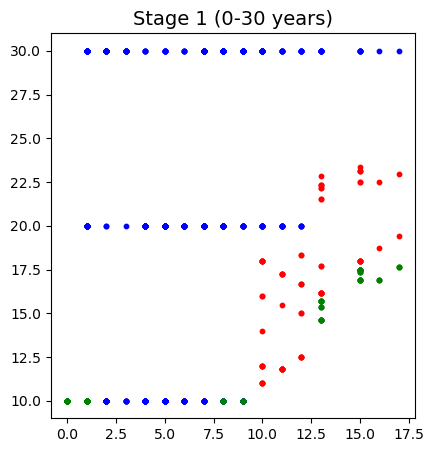

In [8]:
# Pareto plots
######################################
# User Options
plot_summary = True # plot all monitoring plans
plot_selected = True # plot select number of optimized monitoring plans
######################################

plt.figure(figsize=(16, 5))

plt.subplot(131)
plt.title('Stage 1 (0-%i years)'%((inputs['stage1']-1)*10), fontsize=14)
if plot_summary == True:
    plt.scatter(x1, 10*y1, s=10, c='blue', label='1 array, 1 time')
    plt.scatter(x2, 10*y2, s=10, c='red', zorder=1, label='2 arrays/times')
    plt.scatter(x3, 10*y3, s=10, c='green', zorder=1, label='3 arrays/times')

if plot_selected == True:
    xx = np.array(x1.tolist()+x2.tolist()+x3.tolist())
    yy = 10*np.array(y1.tolist()+y2.tolist()+y3.tolist())
    rr = pareto(xx, yy)
    print(rr)
    ii = subsample_to_n_points(list(zip(xx[rr==1], yy[rr==1])), inputs['number_proposals'])
    #plt.scatter(xx[rr==1],yy[rr==1], s=40, c='lightgray', zorder=0, label='%i selected'%5)
    plt.scatter(xx[rr==1][ii],yy[rr==1][ii], s=80, c='gray', zorder=0,
                label='%i selected'%inputs['number_proposals'])

plt.locator_params(axis='x', integer=True, tight=True)
plt.xlabel('Number of Leaks Detected/Detectable', fontsize=14)
plt.ylabel('Average Time to First Detection [years]', fontsize=14)
if plot_summary == True:    
    plt.legend(bbox_to_anchor=(-0.23,+1))

plt.subplot(132)
plt.title('Stage 2 (%i-%i years)'%((inputs['stage1'])*10, (inputs['stage2']-1)*10),
            fontsize=14)
if plot_summary == True:
    plt.scatter(x4, 10*inputs['stage1']+10*y4, s=10, c='blue', label='1 array, 1 time')
    plt.scatter(x5, 10*inputs['stage1']+10*y5, s=10, c='red', zorder=1, label='2 arrays/times')
    plt.scatter(x6, 10*inputs['stage1']+10*y6, s=10, c='green', zorder=1, label='3 arrays/times')

if plot_selected == True:
    xx = np.array(x4.tolist()+x5.tolist()+x6.tolist())
    yy = 10*np.array(y4.tolist()+y5.tolist()+y6.tolist())
    rr = pareto(xx, yy)
    print(rr)
    ii = subsample_to_n_points(list(zip(xx[rr==1], yy[rr==1])),
                                inputs['number_proposals'])
    #plt.scatter(xx[rr==1],10*inputs['stage1']+yy[rr==1], s=40, c='lightgray', zorder=0, label='%i selected'%5)
    plt.scatter(xx[rr==1][ii], 10*inputs['stage1']+yy[rr==1][ii], s=80,
                c='gray', zorder=0, label='%i selected'%inputs['number_proposals'])

plt.locator_params(axis='x', integer=True, tight=True)
plt.xlabel('Number of Leaks Detected/Detectable', fontsize=14)
plt.ylabel('Average Time to First Detection [years]', fontsize=14)

plt.subplot(133)
plt.title('Stage 3 (%i-200 years)'%(inputs['stage2']*10),fontsize=14)
if plot_summary == True:
    plt.scatter(x7, 10*inputs['stage2']+10*y7, s=10, c='blue', label='1 array, 1 time')
    plt.scatter(x8, 10*inputs['stage2']+10*y8, s=10, c='red', zorder=1, label='2 arrays/times')
    plt.scatter(x9, 10*inputs['stage2']+10*y9, s=10, c='green', zorder=1, label='3 arrays/times')

if plot_selected == True:
    xx = np.array(x7.tolist()+x8.tolist()+x9.tolist())
    yy = 10*np.array(y7.tolist()+y8.tolist()+y9.tolist())
    rr = pareto(xx, yy)
    print(rr)
    ii = subsample_to_n_points(list(zip(xx[rr==1], yy[rr==1])), inputs['number_proposals'])
    #plt.scatter(xx[rr==1],10*inputs['stage2']+yy[rr==1], s=40, c='lightgray', zorder=0, label='%i selected'%5)
    plt.scatter(xx[rr==1][ii],10*inputs['stage2']+yy[rr==1][ii], s=80,
                c='gray', zorder=0, label='%i selected'%inputs['number_proposals'])

plt.locator_params(axis='x', integer=True, tight=True)
plt.xlabel('Number of Leaks Detected/Detectable', fontsize=14)
plt.ylabel('Average Time to First Detection [years]', fontsize=14)

plt.show()
plt.savefig('%s/multi_stage_optimization.png'%inputs['directory_plots'],format='png',bbox_inches='tight')
plt.close()

stage1_best [[[17, 1], [42, 2], [393, 3]], 17, 1.7647058823529411, [0, 3, 5, 9, 10, 16, 22, 27, 30, 32, 33, 35, 37, 42, 44, 45, 46]]
17 {'source': 0, 'receivers': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], 'num_receivers': 90}
42 {'source': 0, 'receivers': [12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96], 'num_receivers': 15}


393 {'source': 7, 'receivers': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], 'num_receivers': 85}


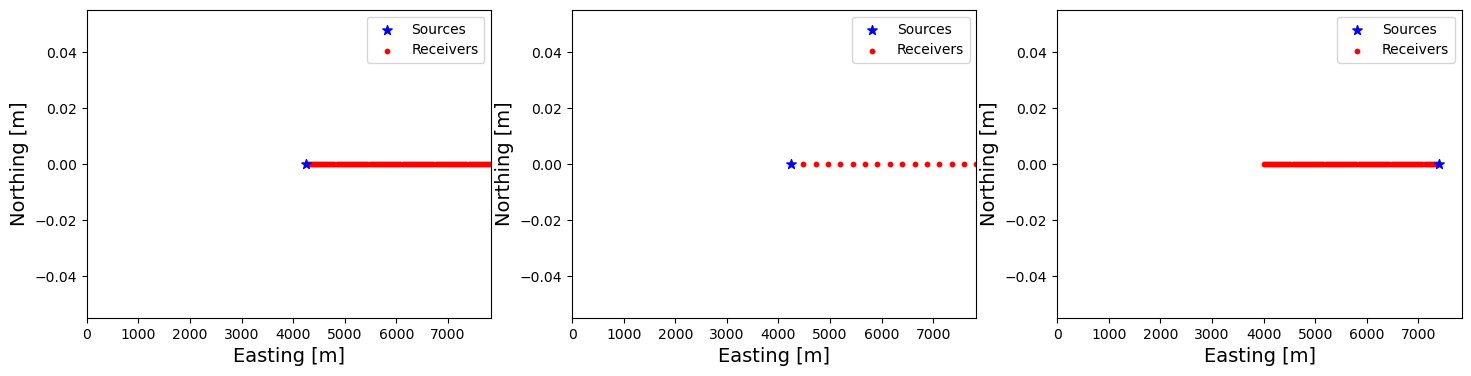

Array #17 at year 10
Array #42 at year 20
Array #393 at year 30


In [8]:
# Plot array configurations
######################################
# User Options
num_arrays=3 # 1,2,3 arrays or times
stage = 1
projection = '2d' # 2d or 3d
######################################

if stage == 3:
    if num_arrays ==3:
        Xx = x9
        Yy = y9
        Plans = plans9
    elif num_arrays ==2:
        Xx = x8
        Yy = y8
        Plans = plans8
    elif num_arrays ==1:
        Xx = x7
        Yy = y7
        Plans = plans7    
elif stage == 2:
    if num_arrays ==3:
        Xx = x6
        Yy = y6
        Plans = plans6
    elif num_arrays ==2:
        Xx = x5
        Yy = y5
        Plans = plans5
    elif num_arrays ==1:
        Xx = x4
        Yy = y4
        Plans = plans4
elif stage == 1:
    if num_arrays ==3:
        Xx = x3
        Yy = y3
        Plans = plans3
    elif num_arrays ==2:
        Xx = x2
        Yy = y2
        Plans = plans2
    elif num_arrays ==1:
        Xx = x1
        Yy = y1
        Plans = plans1

candidates = np.where(Xx==np.max(Xx))[0]
if stage ==3:
    stage3_best = np.random.choice(candidates[np.where(Yy[candidates]==np.min(Yy[candidates]))[0]])
    Stage = stage3_best
    print('stage3_best', Plans[Stage])
if stage ==2:
    stage2_best = np.random.choice(candidates[np.where(Yy[candidates]==np.min(Yy[candidates]))[0]])
    Stage = stage2_best
    print('stage2_best', Plans[Stage]) 
if stage ==1:
    stage1_best = np.random.choice(candidates[np.where(Yy[candidates]==np.min(Yy[candidates]))[0]])
    Stage = stage1_best
    print('stage1_best', Plans[Stage])
    
xmin = +np.inf
xmax = -np.inf
for deployment in Plans[Stage][0]:
    iArray = deployment[0]
    iSource = configuration.arrays[iArray]['source']
    iReceivers = configuration.arrays[iArray]['receivers']
    xyz = np.array(configuration.sources.coordinates[iSource])
    xmin = np.min([xmin, np.min(xyz)])
    xmax = np.max([xmax, np.max(xyz)])
    xyz = np.array(configuration.receivers.coordinates[iReceivers])
    xmin = np.min([xmin, np.min(xyz)])
    xmax = np.max([xmax, np.max(xyz)])


if projection == '2d':
    fig = plt.figure(figsize=(24, 4))
if projection == '3d':
    fig = plt.figure(figsize=(24, 8))
kk = 1
for deployment in Plans[Stage][0]:
    if projection == '2d':
        ax = fig.add_subplot(1, len(Plans[Stage]), kk)
    elif projection == '3d':
        ax = fig.add_subplot(1, len(Plans[Stage]), kk, projection='3d')
    iArray = deployment[0]
    iTime = deployment[1]
    print(iArray, configuration.arrays[iArray])

    iSource = configuration.arrays[iArray]['source']
    iReceivers = configuration.arrays[iArray]['receivers']

    xyz = np.array(configuration.sources.coordinates[iSource])
    if projection == '2d':
        ax.scatter(xyz[0], xyz[1], s=50, c='b', marker='*', zorder=1, label='Sources')
    elif projection == '3d':
        ax.scatter(xyz[0], xyz[1], xyz[2], s=50, c='b', marker='*', zorder=1, label='Sources')

    xyz = np.array(configuration.receivers.coordinates[iReceivers])
    if projection == '2d':
        ax.scatter(xyz[:, 0], xyz[:, 1], s=10, c='r', zorder=0, label='Receivers')
    elif projection == '3d':
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], s=10, c='r', zorder=0, label='Receivers')

    plt.legend()
    ax.set_xlim([xmin,xmax])
    ax.set_xlabel('Easting [m]', fontsize=14)
    ax.set_ylabel('Northing [m]', fontsize=14)
    if projection == '3d':
        ax.set_zlabel('Depth [m]', fontsize=14)
    kk+=1

if Stage == 1:
    plt.savefig('%s/arrays_stage1.png'%inputs['directory_plots'],format='png', bbox_inches='tight')
elif Stage == 2:
    plt.savefig('%s/arrays_stage2.png'%inputs['directory_plots'],format='png', bbox_inches='tight')
elif Stage == 3:
    plt.savefig('%s/arrays_stage3.png'%inputs['directory_plots'],format='png', bbox_inches='tight')
plt.show()
plt.close()

for P in Plans[Stage][0]:
    if stage == 1:
        year = 0
    elif stage == 2:
        year = inputs['stage1']
    elif stage == 3:
        year = inputs['stage2'] 
    
    print(f'Array #{P[0]} at year {(P[1] + year)*10}')

array #356 detects 7 leaks at year 10
array #356 detects 9 leaks at year 20
array #356 detects 11 leaks at year 30
array #356 detects 12 leaks at year 40
array #356 detects 12 leaks at year 50
array #356 detects 12 leaks at year 60
array #356 detects 12 leaks at year 70
array #356 detects 12 leaks at year 80
array #356 detects 13 leaks at year 100
array #356 detects 13 leaks at year 110
array #356 detects 13 leaks at year 120
array #356 detects 13 leaks at year 130
array #356 detects 13 leaks at year 140
array #356 detects 13 leaks at year 150
array #356 detects 13 leaks at year 160
array #356 detects 13 leaks at year 170
array #356 detects 13 leaks at year 180
array #356 detects 13 leaks at year 190
Sources: 6920.0
Receivers: [4520. 4600. 4680. 4760. 4840. 4920. 5000. 5080. 5160. 5240. 5320. 5400.
 5480. 5560. 5640. 5720. 5800. 5880. 5960. 6040. 6120. 6200. 6280. 6360.
 6440. 6520. 6600. 6680. 6760. 6840.]


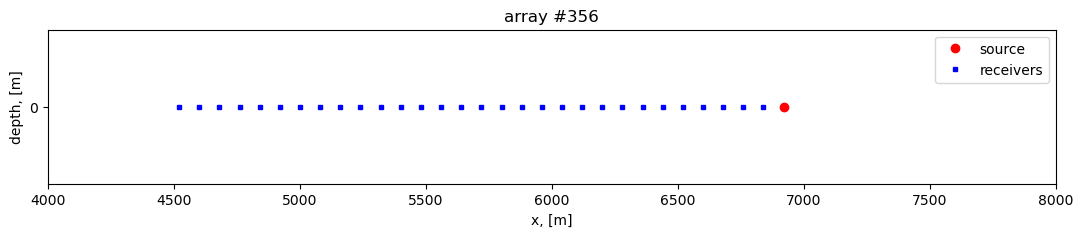

In [9]:
# Plot specific array
#######################
array = 356
#######################


Year = []
Det= []

for plans in plans1:
    if plans[0][0][0] == array:
        # print(f'array #{array} will detect {plans[1]} leaks at year {plans[2]*10}')
        Year.append(plans[2]*10)
        Det.append(plans[1])
Max = np.max(Det)

for plans in plans4:
    if plans[0][0][0] == array:
        # print(f'array #{array} will detect {plans[1]} leaks at year {(plans[2]*10)+40}')
        Year.append((plans[2]*10)+40)
        Det.append(plans[1]+Max)
Max = np.max(Det)

for plans in plans7:
    if plans[0][0][0] == array:
        # print(f'array #{array} will detect {plans[1]} leaks at year {(plans[2]*10)+90}')
        Year.append((plans[2]*10)+90)
        Det.append(plans[1]+Max)
        
DF = np.zeros((len(Year),2))
DF[:,0] = Year 
DF[:,1] =Det  
DF = DF[DF[:, 0].argsort()] 
for d in DF:
    print(f'array #{array} detects {int(d[1])} leaks at year {int(d[0])}')
    
plot_array(sources, receivers, configuration, array, labels=False, plot_all=False) 



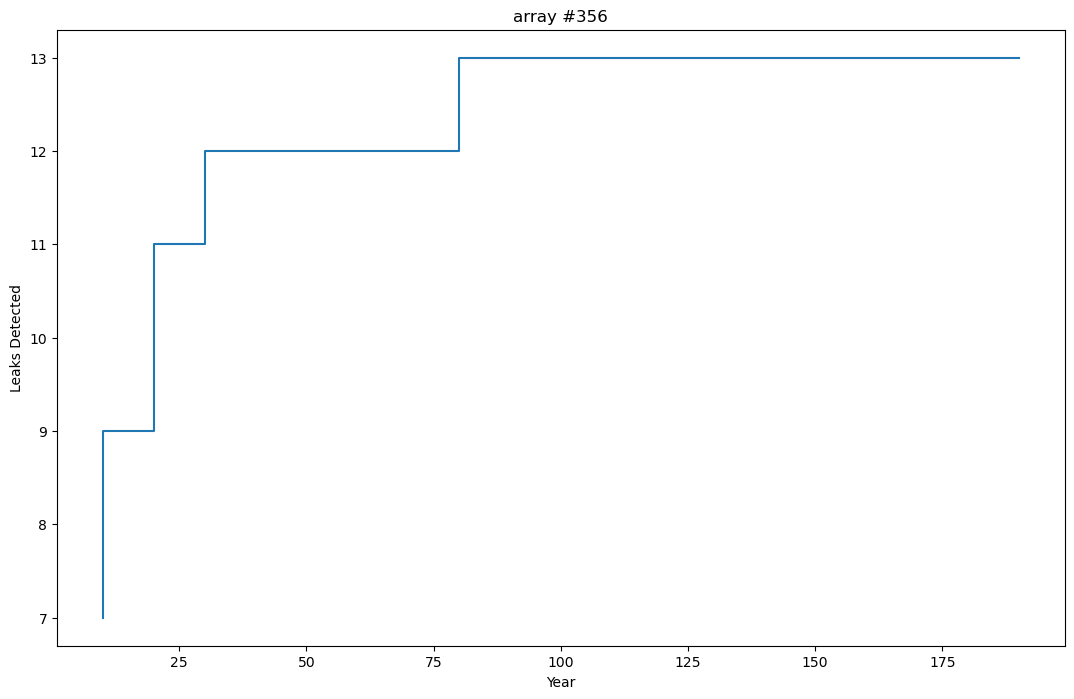

In [10]:

# plot leaks detected over time for specific array selected above
total_leaks = 25 # Placeholder for total number of leaks
out_of_total = False

fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)
ax.step(DF[:,0], DF[:,1])
ax.set_xlabel('Year')
ax.set_ylabel('Leaks Detected')
ax.set_title('array #{}'.format(array) )
if out_of_total == True:
    ax.set_ylim([0, total_leaks])


nrmsBool.shape (489, 49, 20)
[[[447, 0], [26, 1], [15, 0]], 2, 0.0, [17, 27]]
[[[32, 1], [393, 6], [393, 10]], 4, 5.75, [11, 15, 20, 28]]


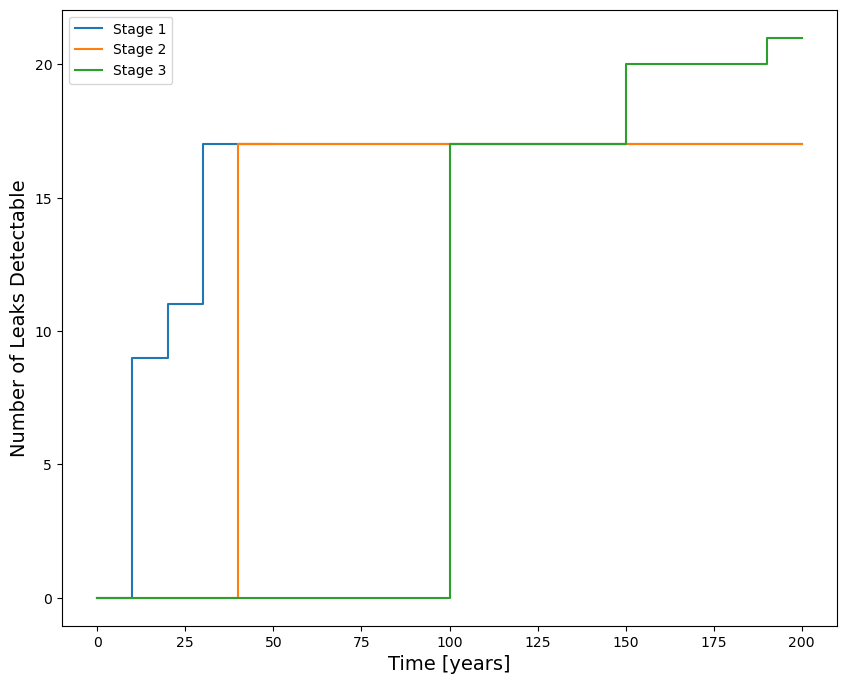

In [11]:
# plot leaks detected over time

# Set number of arrays above or here
# num_arrays=3 # 1,2,3 arrays or times

out_of_total = False

plt.figure(figsize=(10, 8))
print('nrmsBool.shape', nrmsBool.shape)

# Stage 1
if num_arrays ==3:
    Xx = x3
    Yy = y3
    Plans = plans3
elif num_arrays ==2:
    Xx = x2
    Yy = y2
    Plans = plans2
elif num_arrays ==1:
    Xx = x1
    Yy = y1
    Plans = plans1
candidates = np.where(Xx==np.max(Xx))[0]
stage1_best = np.random.choice(candidates[np.where(Yy[candidates]==np.min(Yy[candidates]))[0]])
Stage = stage1_best

###########
# print(Plans[Stage])
tt  = [0]
dd  = [0]
for deployment in Plans[Stage][0]:
    tt += [10*deployment[1]]

detections = nrmsBool[Plans[Stage][0][0][0], :,
                        Plans[Stage][0][0][1]]
#print(plans3[stage1_best][0][0][0],Plans[stage1_best][0][0][1])
#print(detections)
#print(np.sum(detections))
#exit()
dd += [np.sum(detections)]
if num_arrays >1:
    detections = [a or b for a, b in zip(
        detections,
        nrmsBool[Plans[Stage][0][1][0], :, Plans[Stage][0][1][1]])]
    dd += [np.sum(detections)]
if num_arrays >2:
    detections = [a or b for a, b in zip(
        detections,
        nrmsBool[Plans[Stage][0][2][0], :, Plans[Stage][0][2][1]])]
    dd += [np.sum(detections)]

tt += [200]
dd += [dd[-1]]
tt, dd = scatter2step(tt, dd)
plt.plot(tt, dd, label='Stage 1')

# Stage 2
if num_arrays ==3:
    Xx = x6
    Yy = y6
    Plans = plans6
elif num_arrays ==2:
    Xx = x5
    Yy = y5
    Plans = plans5
elif num_arrays ==1:
    Xx = x4
    Yy = y4
    Plans = plans4
candidates = np.where(Xx==np.max(Xx))[0]
stage1_best = np.random.choice(candidates[np.where(Yy[candidates]==np.min(Yy[candidates]))[0]])
Stage = stage1_best
print(Plans[Stage])
tt = [0]
dd = [0]
for deployment in Plans[Stage][0]:
    tt += [10*inputs['stage1']+10*deployment[1]]

detections = [a or b for a, b in zip(
    detections,
    nrmsBool[Plans[Stage][0][0][0], :, Plans[Stage][0][0][1]])]
dd += [np.sum(detections)]
if num_arrays > 1:
    detections = [a or b for a, b in zip(
        detections,
        nrmsBool[Plans[Stage][0][1][0], :, Plans[Stage][0][1][1]])]
    dd += [np.sum(detections)]
if num_arrays > 2:
    detections = [a or b for a, b in zip(
        detections,
        nrmsBool[Plans[Stage][0][2][0], :, Plans[Stage][0][2][1]])]
    dd += [np.sum(detections)]

tt += [200]
dd += [dd[-1]]
tt, dd = scatter2step(tt, dd)
plt.plot(tt, dd,label='Stage 2')


# Stage 3
if num_arrays ==3:
    Xx = x9
    Yy = y9
    Plans = plans9
elif num_arrays ==2:
    Xx = x8
    Yy = y8
    Plans = plans8
elif num_arrays ==1:
    Xx = x7
    Yy = y7
    Plans = plans7
candidates = np.where(Xx==np.max(Xx))[0]
stage3_best = np.random.choice(candidates[np.where(Yy[candidates]==np.min(Yy[candidates]))[0]])
Stage = stage3_best
print(Plans[Stage])
tt = [0]
dd = [0]
for deployment in Plans[Stage][0]:
    tt += [10*inputs['stage2']+10*deployment[1]]

detections = [a or b for a, b in zip(
    detections,
    nrmsBool[Plans[Stage][0][0][0], :, Plans[Stage][0][0][1]])]
dd += [np.sum(detections)]
if num_arrays > 1:
    detections = [a or b for a, b in zip(
        detections,
        nrmsBool[Plans[Stage][0][1][0], :, Plans[Stage][0][1][1]])]
    dd += [np.sum(detections)]
if num_arrays > 2:
    detections = [a or b for a, b in zip(
        detections,
        nrmsBool[Plans[Stage][0][2][0], :, Plans[Stage][0][2][1]])]
    dd += [np.sum(detections)]

tt += [200]
dd += [dd[-1]]
tt, dd = scatter2step(tt, dd)
plt.plot(tt, dd, label='Stage 3')

plt.legend()
plt.xlabel('Time [years]', fontsize=14)
plt.ylabel('Number of Leaks Detectable', fontsize=14)
if out_of_total == True:
    ax.set_ylim([0, total_leaks])
plt.savefig('%s/detection_breakthrough_curve.png'%inputs['directory_plots'],
            format='png', bbox_inches='tight')
plt.show()
plt.close()